In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_bj = pd.read_csv('./Cities/Beijing_labeled.csv')
df_sy = pd.read_csv('./Cities/Shenyang_labeled.csv')
df_gz = pd.read_csv('./Cities/Guangzhou_labeled.csv')
df_sh = pd.read_csv('./Cities/Shanghai_labeled.csv')
df_train = df_bj.append(df_sy)

Ytrain = df_train['PM_HIGH']
Xtrain = df_train.drop(columns = ['PM_HIGH'])
ytrain = Ytrain.to_numpy()

Ytest_gz = df_gz['PM_HIGH']
Ytest_sh = df_sh['PM_HIGH']

Xtest_gz = df_gz.drop(columns = ['PM_HIGH'])
Xtest_sh = df_sh.drop(columns = ['PM_HIGH'])

ytest_gz = Ytest_gz.to_numpy()
ytest_sh = Ytest_sh.to_numpy()



C:\Users\WU\AppData\Local\Temp\ipykernel_73688\2366717955.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_bj.append(df_sy)


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


Text(0, 0.5, 'inertia')

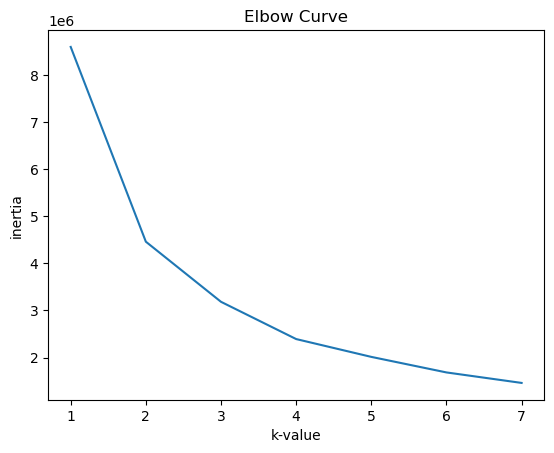

In [6]:
ks = range(1,8)
dis = []
for k_e in ks:
    kmeans = KMeans(n_clusters = k_e ,random_state = 0)
    kmeans.fit(Xtrain)
    dis.append(kmeans.inertia_)
plt.plot(ks,dis)
plt.title('Elbow Curve')
plt.xlabel('k-value')
plt.ylabel('inertia')

In [59]:
class K_Means(object):
    def __init__(self,k):
        self.k = k
    def fit(self,x_train_df,y_train_df):
        ''' generate a mapping reflecting the label of each centroid'''
        
        x_train = x_train_df.to_numpy()
        self.x_train = x_train
        self.y_train = y_train_df.to_numpy()
        # use kmeans to allocate data to different clusters
        self.kmeans = KMeans(self.k)
        self.kmeans.fit(self.x_train)
        # find out which cluster each data belongs to
        centroid_labels = self.kmeans.labels_
        labels = []
        # create the mapping as a dictionary
        self.dic_ref = dict.fromkeys(range(self.k),0)
        for i in range(self.k):
            # create a list to store the labels of the data in each cluster
            labels.append([])
            # get the index of the data in each centroid
            label_value = list(np.where(centroid_labels==i)[0])
            for j in range(len(label_value)):
                labels[i].append(ytrain[label_value[j]])
            # judge what's the majority label of each centroid
            if labels[i].count(0)/len(labels[i])>0.5:
                self.dic_ref[i] = 0
            else:
                self.dic_ref[i] = 1
        self.ytrain_fit = []
        # predict the label of train data
        for i in range(len(centroid_labels)):
            for key, value in self.dic_ref.items():
                if centroid_labels[i] == key:
                    self.ytrain_fit.append(value)
        
    def predict(self, x_test_df, y_test_df):
        '''predict the label on test set'''
        self.x_test = x_test_df.to_numpy()
        self.y_test = y_test_df.to_numpy()
        centroid_labels_test = self.kmeans.predict(self.x_test)
        self.ytest_predict = []
        for i in range(len(centroid_labels_test)):
            for key, value in self.dic_ref.items():
                if centroid_labels_test[i] == key:
                    self.ytest_predict.append(value)
        
        return self.ytest_predict
        
    def score(self, y_guess, y_test):
        '''evaluate the prediction'''
        Y_test = list(y_test)
        count1 = 0
        count2 = 0
        for i in Y_test:
            if Y_test[count2] == y_guess[count2]:
                count1=count1+1
            count2=count2+1
        return count1/count2
    
    def score_train(self, y_train):
        '''evaluate the model'''
        Y_train = list(y_train)
        count1 = 0
        count2 = 0
        for i in Y_train:
            if Y_train[count2] == self.ytrain_fit[count2]:
                count1=count1+1
            count2=count2+1
        return count1/count2
    
    def error(self, y_train):
        '''calculate the mean squared error of the model'''
        ytrain_predict = np.array(self.ytrain_fit)
        y_error = (ytrain_predict-y_train)**2
        error = sum(y_error)/len(y_error)
        return error
        
        
clf = K_Means(4) 
clf.fit(Xtrain,Ytrain) 
y_guess_gz = clf.predict(Xtest_gz,Ytest_gz) 
print(clf.score(y_guess_gz, ytest_gz))  
print(clf.score_train(ytrain)) 



0.9363905325443787
0.7250431778929188


In [57]:
y_guess_sh = clf.predict(Xtest_sh,Ytest_sh) 
print(clf.score(y_guess_sh, ytest_sh))  
print(clf.score_train(ytrain)) 

0.9015544041450777
0.7250431778929188
